In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
ds_train=pd.read_excel('Data_Train.xlsx')
ds_test = pd.read_excel('Data_Test.xlsx')

In [4]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
ds_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
print(ds_train.isnull().sum())
print(ds_test.isnull().sum())

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64
TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [7]:
ds_train['VOTES']=ds_train['VOTES'].str.slice(stop=-6)
ds_test['VOTES']=ds_test['VOTES'].str.slice(stop=-6)

In [8]:
ds_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23


In [9]:
ds_train.shape

(12690, 9)

In [10]:
ds_train.dropna(inplace=True)
ds_test.dropna(inplace=True)

In [11]:
ds_test.shape

(3797, 8)

In [12]:
print(ds_train.isnull().sum())
print(ds_test.isnull().sum())

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64


In [13]:
ds_train['VOTES']=ds_train['VOTES'].astype(int)

In [14]:
ds_test['VOTES']=ds_test['VOTES'].astype(int)

In [15]:
dat_train = ds_train.CUISINES.apply(lambda x: len(x.split(',')))
dat_test = ds_test.CUISINES.apply(lambda x: len(x.split(',')))

In [17]:
print("\033[1m"+'max number of CUISINES hold by restaurant in train is '+"\033[0m",max(dat_train))
print(ds_train.CUISINES[dat_train.idxmax()])
print("\033[1m"+'minimum number of CUISINES hold by restaurant in train is '+"\033[0m",min(dat_train))
print(ds_train.CUISINES[dat_train.idxmin()])

max number of CUISINES hold by restaurant in train is  8
Continental, American, Asian, North Indian, Chinese, Pizza, Biryani,
minimum number of CUISINES hold by restaurant in train is  1
Desserts


In [18]:
print("\033[1m"+'max number of CUISINES hold by restaurant in test is'+"\033[0m",max(dat_test))
print(ds_test.CUISINES[dat_test.idxmax()])
print("\033[1m"+'min number of CUISINES hold by restaurant in test is'+"\033[0m",min(dat_test))
print(ds_test.CUISINES[dat_test.idxmin()])

max number of CUISINES hold by restaurant in test is 8
Arabian, Biryani, Fast Food, Lucknowi, North Indian, Kebab, Mughlai,
min number of CUISINES hold by restaurant in test is 1
Biryani


we can make the number of cusisines as a way to deal with the cusines column

In [19]:
ds_train.CUISINES=dat_train
ds_test.CUISINES=dat_test

In [20]:
ds_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES          int64
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES             int32
COST              int64
dtype: object

In [21]:
for i in ds_train.columns:
    print("\033[1m"+i+"\033[0m",ds_train[i].unique())
    print('----------')

TITLE ['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'PUB,CASUAL DINING' 'MESS' 'MICROBREWERY,CASUAL DINING'
 'CASUAL DINING,SWEET SHOP' 'KIOSK' 'QUICK BITES,KIOSK' 'CLUB'
 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES' 'FOOD COURT,QUICK BITES'
 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY'
 'LOUNGE,BAR' 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'QUICK BITES,SWEET SHOP'
 'BEVERAGE SHOP,QUI

In [22]:
for i in ds_test.columns:
    print("\033[1m"+i+"\033[0m",ds_test[i].unique())
    print('----------')

TITLE ['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAR' 'FOOD COURT' 'QUICK BITES,SWEET SHOP'
 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR' 'KIOSK' 'CAFÉ,BAKERY'
 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ' 'CASUAL DINING,CAFÉ' 'MESS'
 'BAR,CASUAL DINING' 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR'
 'PUB,FINE DINING' 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING'
 'LOUNGE,CASUAL DINING' 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR'
 'CASUAL DINING,SWEET SHOP' 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB'
 'FOOD TRUCK' 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PARLOR' 'MICROBREWERY,CASUAL DINING'
 'DESSERT

In [23]:
ds_train.duplicated().sum()
ds_test.duplicated().sum()

1

In [24]:
ds_train=ds_train.drop_duplicates()
ds_test=ds_test.drop_duplicates()

In [25]:
ds_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES          int64
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES             int32
COST              int64
dtype: object

In [26]:
ds_train['RATING']=ds_train['RATING'].str.extract('(\d+)').astype(float)
ds_test['RATING']=ds_test['RATING'].str.extract('(\d+)').astype(float)

In [27]:
print(ds_train.dtypes)
print(ds_test.dtypes)

TITLE             object
RESTAURANT_ID      int64
CUISINES           int64
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object
TITLE             object
RESTAURANT_ID      int64
CUISINES           int64
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
dtype: object


In [28]:
ds_train.drop('TIME',axis=1,inplace=True)
ds_test.drop('TIME',axis=1,inplace=True)

In [29]:
ds_train['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Secunderabad', 'India',
       'Madhuranagar', 'Chennai Teynampet', 'Faridabad', 'Chembur.',
       'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Bengalore', 'Near Reliance Fresh', 'Kilpauk',
       'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kandivali', 'Dewan Rama Road', 'Gurugram', 'Sector 51 Noida',
 

In [30]:
ds_train['Location']=ds_train.CITY+' '+ds_train.LOCALITY
ds_test['Location']=ds_test.CITY+' '+ds_test.LOCALITY

In [31]:
ds_train

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,3,Thane,Dombivali East,3.0,49,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,3,Chennai,Ramapuram,4.0,30,1500,Chennai Ramapuram
2,CASUAL DINING,10915,4,Chennai,Saligramam,3.0,221,800,Chennai Saligramam
3,QUICK BITES,6346,2,Mumbai,Bandra West,4.0,24,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,1,Mumbai,Lower Parel,3.0,165,300,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,3,Hyderabad,Gachibowli,3.0,546,500,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,2,Mumbai,Bandra Kurla Complex,4.0,1214,1800,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,4,Navi Mumbai,Vashi,4.0,608,1300,Navi Mumbai Vashi
12688,CASUAL DINING,6134,4,Chennai,Maduravoyal,3.0,32,400,Chennai Maduravoyal


In [32]:
ds_train['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'QUICK BITES,FOOD COURT', 'SWEET SHOP', 'PUB,CASUAL DINING',
       'MESS', 'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP',
       'KIOSK', 'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'DHABA',
       'CAFÉ,DESSERT PARLOR', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,DESSERT PARLOR', 'PUB,MICROBREWERY', 'LOUNGE,BAR',
      

In [33]:
#encoding teh country column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
ds_train['TITLE']=le.fit_transform(ds_train['TITLE'])
ds_test['TITLE']=le.fit_transform(ds_test['TITLE'])

In [34]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,Location
0,29,9438,3,Thane,Dombivali East,3.0,49,1200,Thane Dombivali East
1,31,13198,3,Chennai,Ramapuram,4.0,30,1500,Chennai Ramapuram
2,29,10915,4,Chennai,Saligramam,3.0,221,800,Chennai Saligramam
3,93,6346,2,Mumbai,Bandra West,4.0,24,800,Mumbai Bandra West
4,48,15387,1,Mumbai,Lower Parel,3.0,165,300,Mumbai Lower Parel


In [35]:
ds_test.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,Location
0,22,4085,4,Noida,Sector 18,4.0,564,Noida Sector 18
1,73,12680,4,Mumbai,Grant Road,4.0,61,Mumbai Grant Road
2,22,1411,4,Mumbai,Marine Lines,3.0,350,Mumbai Marine Lines
3,64,204,1,Faridabad,NIT,3.0,1445,Faridabad NIT
4,73,13453,2,Kochi,Kaloor,3.0,23,Kochi Kaloor


In [36]:
ds_train.drop(['RESTAURANT_ID','CITY','LOCALITY','Location'],axis=1,inplace=True)
ds_test.drop(['RESTAURANT_ID','CITY','LOCALITY','Location'],axis=1,inplace=True)

In [37]:
ds_train.head()

,TITLE,CUISINES,RATING,VOTES,COST
0,29,3,3.0,49,1200
1,31,3,4.0,30,1500
2,29,4,3.0,221,800
3,93,2,4.0,24,800
4,48,1,3.0,165,300


In [38]:
ds_train.corr()

,TITLE,CUISINES,RATING,VOTES,COST
TITLE,1.000000,-0.202728,-0.164653,-0.134828,-0.265930
CUISINES,-0.202728,1.000000,0.146029,0.190273,0.210365
RATING,-0.164653,0.146029,1.000000,0.310909,0.321013
VOTES,-0.134828,0.190273,0.310909,1.000000,0.244776
COST,-0.265930,0.210365,0.321013,0.244776,1.000000


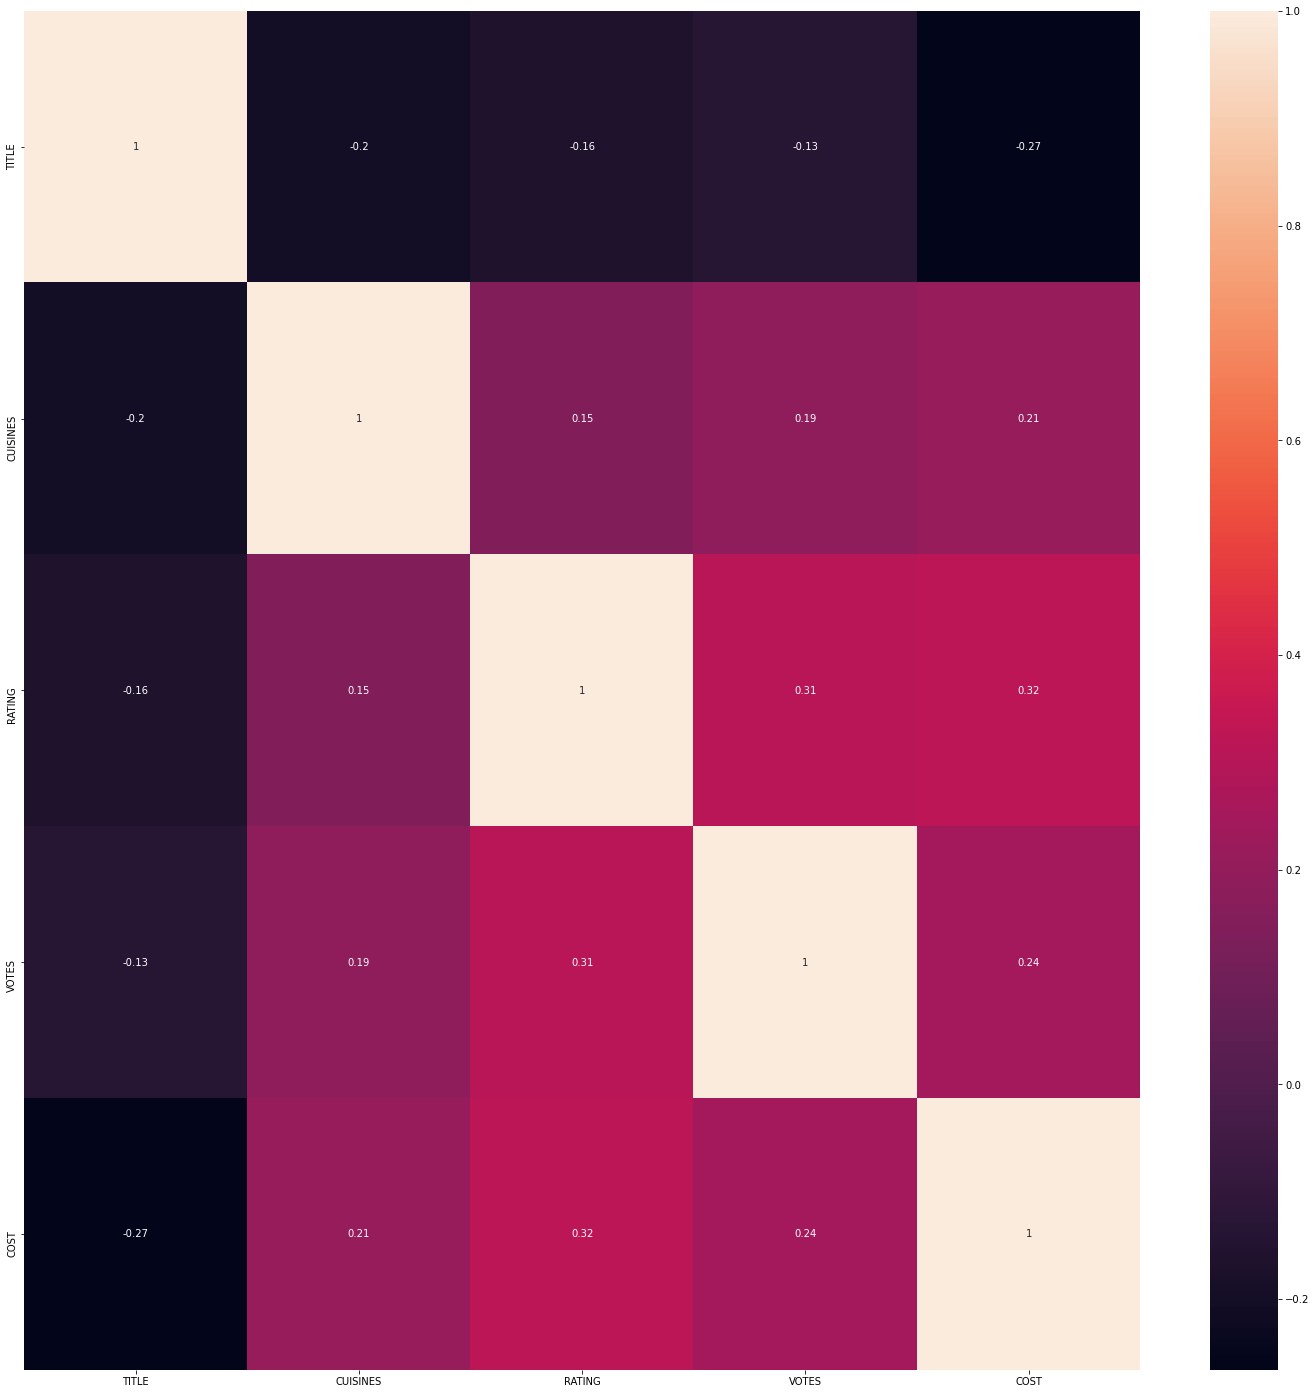

In [39]:
fig, ax=plt.subplots(figsize=(25,25))
sns.heatmap(ds_train.corr(),color='k',annot=True)

In [40]:
x=ds_train.iloc[:,0:-1]
y=ds_train.iloc[:,-1]

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [42]:
pred_lr=lr.predict(ds_test)

In [43]:
pd.DataFrame(pred_lr).to_csv('lr_pred.csv')

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x,y)
rfr_pred=rfr.predict(ds_test)

In [45]:
pd.DataFrame(rfr_pred).to_csv('rfr_pred.csv')